In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

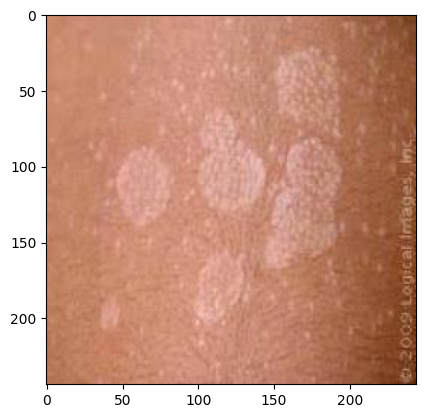

In [2]:
# Load the train image for review
img_path = image.load_img('facial_disease/train/panu/pa3_jpg.rf.00c943211941b5165056c59584a23574.jpg', target_size=(244, 244))

# show the image
plt.imshow(img_path)
plt.show()

In [3]:
# Create the train generator
train_dir = os.path.join('facial_disease/train')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.2)

In [4]:
# Create the train and validation generator

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 320 images belonging to 5 classes.


Found 78 images belonging to 5 classes.


In [5]:
# check the batch size and the class
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(train_generator.batch_size)

{'acne': 0, 'eksim': 1, 'herpes': 2, 'panu': 3, 'rosacea': 4}
{'acne': 0, 'eksim': 1, 'herpes': 2, 'panu': 3, 'rosacea': 4}
8


In [6]:
# Get batch shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 244, 244, 3)
labels batch shape: (8, 5)


In [7]:
# Create the model with the best model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='softmax')  
])

# Proses Training menggunakan Callback agar tidak Overfitting

In [8]:
# Compile the model with adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Terminate the training if the model is overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [10]:
# fit the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks=[early_stop]
)

Epoch 1/100


40/40 - 13s - loss: 13.2458 - accuracy: 0.1906 - val_loss: 11.3297 - val_accuracy: 0.2308 - 13s/epoch - 337ms/step
Epoch 2/100
40/40 - 11s - loss: 9.9971 - accuracy: 0.2250 - val_loss: 8.8038 - val_accuracy: 0.2692 - 11s/epoch - 281ms/step
Epoch 3/100
40/40 - 11s - loss: 7.9687 - accuracy: 0.2344 - val_loss: 7.2069 - val_accuracy: 0.2692 - 11s/epoch - 275ms/step
Epoch 4/100
40/40 - 11s - loss: 6.6063 - accuracy: 0.3281 - val_loss: 6.0892 - val_accuracy: 0.3462 - 11s/epoch - 277ms/step
Epoch 5/100
40/40 - 11s - loss: 5.6582 - accuracy: 0.3594 - val_loss: 5.3162 - val_accuracy: 0.3333 - 11s/epoch - 281ms/step
Epoch 6/100
40/40 - 11s - loss: 5.0361 - accuracy: 0.2812 - val_loss: 4.7466 - val_accuracy: 0.3974 - 11s/epoch - 277ms/step
Epoch 7/100
40/40 - 11s - loss: 4.4361 - accuracy: 0.3844 - val_loss: 4.2868 - val_accuracy: 0.2692 - 11s/epoch - 284ms/step
Epoch 8/100
40/40 - 11s - loss: 4.0603 - accuracy: 0.3531 - val_loss: 3.9335 - val_accuracy: 0.3333 - 11s/epoch - 280ms/s

In [11]:
# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        1

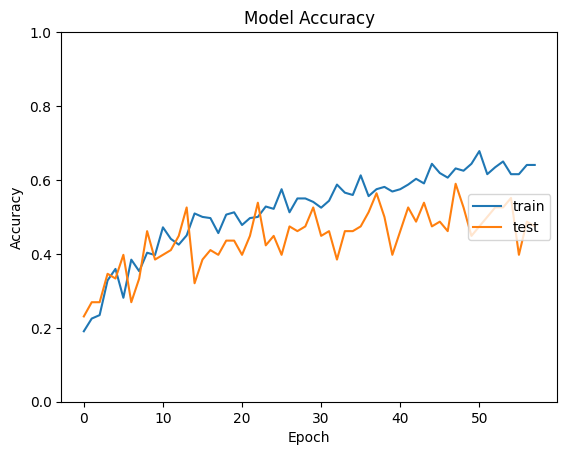

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='right')
plt.show()

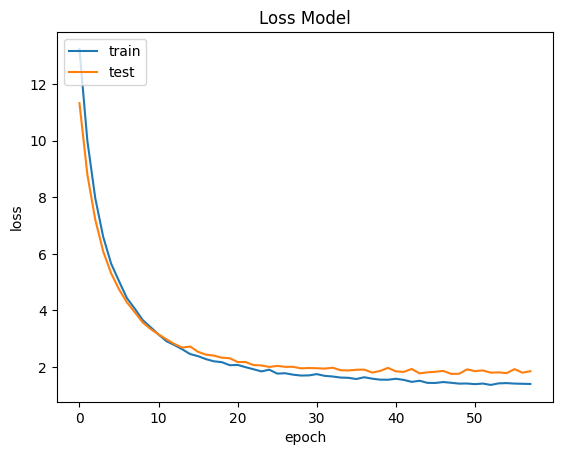

In [13]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Proses Training Ke-2 menggunakan Callback agar Akurasi Tidak lebih dari 85%

In [14]:
# Callback to stop the training if the accuracy is more than 90%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85):
            print("\nThe accuracy is reaching 85%! Terminating the training...\n")
            self.model.stop_training = True

# # Create the callback
callbacks = myCallback()
history_callback = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/100
40/40 - 11s - loss: 1.4260 - accuracy: 0.6187 - val_loss: 1.9032 - val_accuracy: 0.4487 - 11s/epoch - 276ms/step
Epoch 2/100
40/40 - 11s - loss: 1.4536 - accuracy: 0.5906 - val_loss: 1.7728 - val_accuracy: 0.5128 - 11s/epoch - 265ms/step
Epoch 3/100
40/40 - 11s - loss: 1.3960 - accuracy: 0.6531 - val_loss: 1.7367 - val_accuracy: 0.5256 - 11s/epoch - 269ms/step
Epoch 4/100
40/40 - 11s - loss: 1.4057 - accuracy: 0.6125 - val_loss: 1.8039 - val_accuracy: 0.5256 - 11s/epoch - 268ms/step
Epoch 5/100
40/40 - 11s - loss: 1.4295 - accuracy: 0.6281 - val_loss: 1.7555 - val_accuracy: 0.5641 - 11s/epoch - 265ms/step
Epoch 6/100
40/40 - 11s - loss: 1.3763 - accuracy: 0.6469 - val_loss: 1.7782 - val_accuracy: 0.5385 - 11s/epoch - 270ms/step
Epoch 7/100
40/40 - 11s - loss: 1.3775 - accuracy: 0.6375 - val_loss: 1.7578 - val_accuracy: 0.5385 - 11s/epoch - 264ms/step
Epoch 8/100
40/40 - 11s - loss: 1.3813 - accuracy: 0.6313 - val_loss: 1.8531 - val_accuracy: 0.5513 - 11s/epoch - 269ms/step


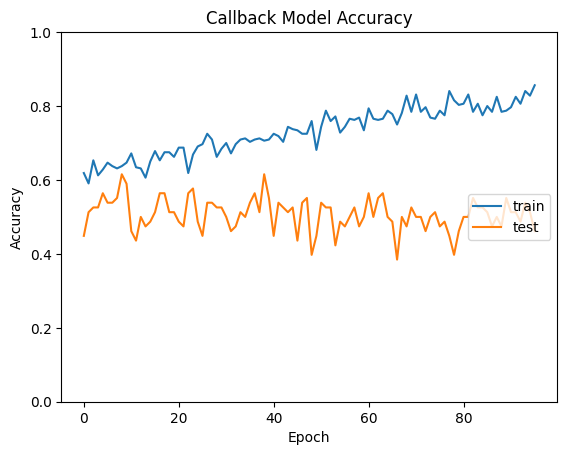

In [15]:
# Plot the callback accuracy
plt.plot(history_callback.history['accuracy'], label='accuracy')
plt.plot(history_callback.history['val_accuracy'], label = 'val_accuracy')
plt.title('Callback Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='right')
plt.show()

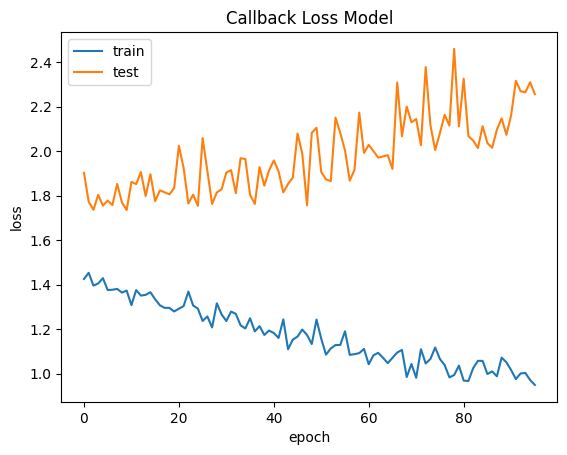

In [16]:
# Plot the callback loss
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('Callback Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Test the model with the callback model
test_dir = os.path.join('facial_disease/test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=16,
    class_mode='categorical'
)

Found 100 images belonging to 5 classes.


In [18]:
# Make the prediction
predictions = model.predict(test_generator)
print(predictions)

7/7 [==============================] - 1s 54ms/step
[[5.28356177e-04 2.65352603e-04 8.33000930e-04 1.86262478e-04
  9.98187125e-01]
 [1.38684949e-02 4.62536067e-02 8.78512263e-01 8.96771904e-03
  5.23979105e-02]
 [1.23438775e-03 4.34488058e-02 1.09618634e-01 1.31466741e-05
  8.45685065e-01]
 [1.41477911e-03 9.01593328e-01 9.66266096e-02 2.37170098e-04
  1.28146130e-04]
 [2.45069750e-02 2.49048900e-02 2.95637338e-03 9.46665883e-01
  9.65880870e-04]
 [2.28359327e-01 1.55809149e-03 1.55887362e-02 7.52022922e-01
  2.47094897e-03]
 [1.12991720e-01 2.52088364e-02 4.01593919e-04 8.59628499e-01
  1.76936132e-03]
 [3.51766273e-02 1.67791590e-01 6.43826425e-01 1.57007028e-03
  1.51635274e-01]
 [6.32586598e-04 1.44616480e-03 1.31502857e-05 2.97722798e-02
  9.68135774e-01]
 [2.29323190e-03 3.65493335e-02 5.15218079e-01 6.57051787e-05
  4.45873648e-01]
 [7.29466081e-01 1.46376221e-02 3.93291898e-02 1.22708447e-01
  9.38587114e-02]
 [6.70023263e-01 1.60517752e-01 4.60982099e-02 3.36288735e-02
  8.97

In [19]:
# Evaluate the model
print("Model Evaluation:")
model.evaluate(test_generator)

Model Evaluation:
7/7 [==============================] - 0s 55ms/step - loss: 2.1114 - accuracy: 0.4700


[2.1114342212677, 0.4699999988079071]

In [21]:
# Save the model
model.save('facial_disease_model.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
